**1. Importação de Pacotes e Módulos**

In [1]:
# Permite importar os módulos a partir do diretório raiz ----
import os
import sys
models_path = os.path.abspath(os.path.join('..'))
if models_path not in sys.path:
    sys.path.append(models_path)
# -----------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

from models.cnnmodels import build_simple_cnn, build_tuned_cnn, build_model_vgg16
from utils2 import (
    load_full_dataset, split_dataset, plot_multiclass_roc, plot_history,
    create_data_generators_robustness, kfold_search_hyperparameters,
    treinar_modelo_multiseed, encontrar_modelo_representativo, limpar_memoria_keras,
    plot_sample_images_per_class

)

import json

DATA_DIR = '../data'
IMG_SIZE = (224, 224)
RANDOM_STATE = 7
SEEDS = [1,2,3]
RUN_KFOLD = False

2025-07-29 11:42:44.113780: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753800164.125321  766037 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753800164.128837  766037 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753800164.139309  766037 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753800164.139319  766037 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753800164.139321  766037 computation_placer.cc:177] computation placer alr

**2. Carregando Dataset**

- Loads the Flower Recognition dataset.
- With *load_full_dataset*, each image is reescaled to the 224x224 image size and Normalized with /255.
    - X contains all image samples, reescaled and normalized.
    - y contains all encoded classes, using label encoder.
- Shows the first 5 examples of each class:
    - Daisy
    - Dandelion
    - Rose
    - Sunflower
    - Tulip    

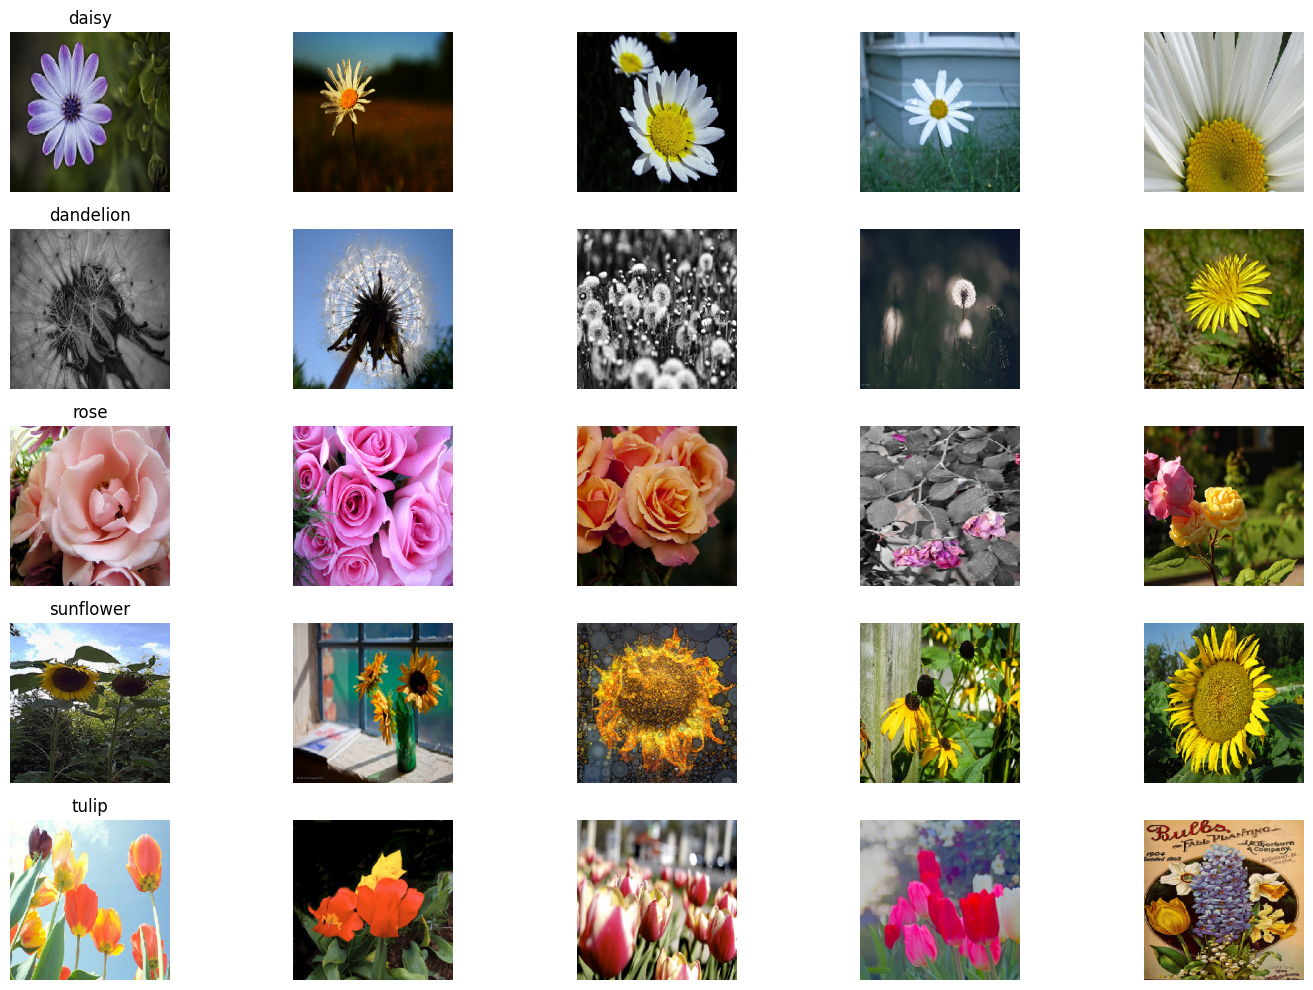

In [2]:
# 2. Carregamento dos Dados
X, y, label_encoder, df = load_full_dataset(DATA_DIR, IMG_SIZE)

# 2.1 Visualização de exemplos por classe
plot_sample_images_per_class(X, y, label_encoder)

**Choosing Model Hiperparameters with K-Fold CrossValidation**
- We use  K-Fold Cross Validation to find the best combination of hiperparameters among available options.
    - Dropout rate, used for each Dropout() layer present in the models.
    - Learning rate, to control the rate of learning for each model (using Adam Optimizer).
    - Batch size, also to control the error correction step using a subset of a epoch's training set.
- A callback set is defined for each model, with Early Stopping if the model doesnt improve for a while.
- Also saves the best model, if needed to be used later.
- Output of each GridSearch is the best parameter set for that model.

In [3]:
param_grid = {
    "dropout_rate": [0.2, 0.35, 0.5],
    "learning_rate": [1e-5, 1e-4],
    "batch_size": [32, 64]
}


if RUN_KFOLD:
    for model_func in [build_simple_cnn, build_tuned_cnn, build_model_vgg16]:
        kfold_search_hyperparameters(X, y, model_func, param_grid, k=4, random_state=RANDOM_STATE)


**Training Models**
- We train each model using three diferent SEEDS.
- The *treinar_modelo_multiseed* function

In [ ]:
with open('build_simple_cnn_best_params.json') as f:
    best_params_simple = json.load(f)
    print(f'best_params_simple {best_params_simple}')

with open('build_tuned_cnn_best_params.json') as f:
    best_params_tuned = json.load(f)
    print(f'best_params_tuned {best_params_tuned}')

with open('build_model_vgg16_best_params.json') as f:
    best_params_vgg16 = json.load(f)
    print(f'best_params_vgg16 {best_params_vgg16}')

simple_metrics, simple_histories, simple_models = treinar_modelo_multiseed(
    X, y, build_simple_cnn, best_params_simple, SEEDS, epochs=300, model_name="simple"
)

tuned_metrics, tuned_histories, tuned_models = treinar_modelo_multiseed(
    X, y, build_tuned_cnn, best_params_tuned, SEEDS, epochs=300, model_name="tuned"
)

vgg_metrics, vgg_histories, vgg_models = treinar_modelo_multiseed(
    X, y, build_model_vgg16, best_params_vgg16, SEEDS, epochs=300, model_name="vgg16"
)

best_params_simple {'dropout_rate': 0.2, 'learning_rate': 0.0001, 'batch_size': 32}
best_params_tuned {'dropout_rate': 0.5, 'learning_rate': 0.0001, 'batch_size': 64}
best_params_vgg16 {'dropout_rate': 0.5, 'learning_rate': 0.0001, 'batch_size': 64}

Treinando com seed 1


/home/mateus/anaconda3/envs/ia_cnn_project/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1753800238.554511  766037 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 19454 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:2b:00.0, compute capability: 8.9
/home/mateus/anaconda3/envs/ia_cnn_project/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_su

Epoch 1/300


I0000 00:00:1753800240.488672  766190 service.cc:152] XLA service 0x70e610004db0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1753800240.488689  766190 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2025-07-29 11:44:00.509661: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1753800240.637085  766190 cuda_dnn.cc:529] Loaded cuDNN version 90300


  3/108 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.2188 - loss: 1.6374

I0000 00:00:1753800242.849385  766190 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


108/108 ━━━━━━━━━━━━━━━━━━━━ 23s 181ms/step - accuracy: 0.3177 - loss: 1.4929 - val_accuracy: 0.5012 - val_loss: 1.1754
Epoch 2/300
108/108 ━━━━━━━━━━━━━━━━━━━━ 17s 157ms/step - accuracy: 0.5254 - loss: 1.1501 - val_accuracy: 0.5475 - val_loss: 1.1053
Epoch 3/300
108/108 ━━━━━━━━━━━━━━━━━━━━ 17s 154ms/step - accuracy: 0.5562 - loss: 1.0865 - val_accuracy: 0.5926 - val_loss: 1.0320
Epoch 4/300
108/108 ━━━━━━━━━━━━━━━━━━━━ 17s 157ms/step - accuracy: 0.5778 - loss: 1.0736 - val_accuracy: 0.6146 - val_loss: 1.0003
Epoch 5/300
108/108 ━━━━━━━━━━━━━━━━━━━━ 17s 156ms/step - accuracy: 0.6151 - loss: 0.9985 - val_accuracy: 0.6493 - val_loss: 0.9521
Epoch 6/300
108/108 ━━━━━━━━━━━━━━━━━━━━ 16s 152ms/step - accuracy: 0.6191 - loss: 0.9824 - val_accuracy: 0.6400 - val_loss: 0.9542
Epoch 7/300
108/108 ━━━━━━━━━━━━━━━━━━━━ 17s 157ms/step - accuracy: 0.6378 - loss: 0.9487 - val_accuracy: 0.6562 - val_loss: 0.8999
Epoch 8/300
108/108 ━━━━━━━━━━━━━━━━━━━━ 17s 155ms/step - accuracy: 0.6373 - loss: 0.941

/home/mateus/anaconda3/envs/ia_cnn_project/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/mateus/anaconda3/envs/ia_cnn_project/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/300
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 168ms/step - accuracy: 0.3158 - loss: 1.5216 - val_accuracy: 0.4676 - val_loss: 1.1796
Epoch 2/300
108/108 ━━━━━━━━━━━━━━━━━━━━ 17s 156ms/step - accuracy: 0.5078 - loss: 1.1738 - val_accuracy: 0.4988 - val_loss: 1.1481
Epoch 3/300
108/108 ━━━━━━━━━━━━━━━━━━━━ 17s 157ms/step - accuracy: 0.5444 - loss: 1.1067 - val_accuracy: 0.5521 - val_loss: 1.0907
Epoch 4/300
108/108 ━━━━━━━━━━━━━━━━━━━━ 17s 157ms/step - accuracy: 0.5575 - loss: 1.0615 - val_accuracy: 0.5868 - val_loss: 1.0340
Epoch 5/300
108/108 ━━━━━━━━━━━━━━━━━━━━ 18s 165ms/step - accuracy: 0.6104 - loss: 1.0059 - val_accuracy: 0.6238 - val_loss: 0.9883
Epoch 6/300
108/108 ━━━━━━━━━━━━━━━━━━━━ 16s 152ms/step - accuracy: 0.6136 - loss: 1.0056 - val_accuracy: 0.6030 - val_loss: 0.9979
Epoch 7/300
108/108 ━━━━━━━━━━━━━━━━━━━━ 17s 158ms/step - accuracy: 0.6418 - loss: 0.9242 - val_accuracy: 0.6435 - val_loss: 0.9451
Epoch 8/300
108/108 ━━━━━━━━━━━━━━━━━━━━ 16s 152ms/step - accuracy: 0.6402 -

In [ ]:
with open('build_simple_cnn_best_params.json') as f:
    best_params_simple = json.load(f)

with open('build_tuned_cnn_best_params.json') as f:
    best_params_tuned = json.load(f)

with open('build_model_vgg16_best_params.json') as f:
    best_params_vgg16 = json.load(f)

simple_metrics, simple_histories, simple_models = treinar_modelo_multiseed(
    X, y, build_simple_cnn, best_params_simple, SEEDS, epochs=300, model_name="simple"
)

tuned_metrics, tuned_histories, tuned_models = treinar_modelo_multiseed(
    X, y, build_tuned_cnn, best_params_tuned, SEEDS, epochs=300, model_name="tuned"
)

vgg_metrics, vgg_histories, vgg_models = treinar_modelo_multiseed(
    X, y, build_model_vgg16, best_params_vgg16, SEEDS, epochs=300, model_name="vgg16"
)

In [ ]:
simple_idx, simple_model_path, simple_metrics = encontrar_modelo_representativo(simple_models, simple_metrics)
tuned_idx, tuned_model_path, tuned_metrics = encontrar_modelo_representativo(tuned_models, tuned_metrics)
vgg16_idx, vgg16_model_path, vgg16_metrics = encontrar_modelo_representativo(vgg_models, vgg_metrics)

simple_model = load_model(simple_model_path)
tuned_model = load_model(tuned_model_path)
vgg16_model = load_model(vgg16_model_path)

In [ ]:
# --------------------------
# 6. Avaliação Final dos Modelos
# --------------------------
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize

X_train, X_test, y_train, y_test = split_dataset(X, y, seed=SEEDS[0])
y_test_bin = label_binarize(y_test, classes=np.unique(y))

def avaliar_modelo_final(model, nome, history):
    print(f"\n==== Avaliação Final: {nome} ====")
    y_pred = np.argmax(model.predict(X_test), axis=1)
    y_proba = model.predict(X_test)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    plot_multiclass_roc(y_test, y_proba, classes=np.unique(y))
    plot_history(history, title_prefix=nome)

    return y_pred, y_proba

# Avaliação dos três modelos
simple_pred, simple_proba = avaliar_modelo_final(simple_model, "Simple CNN", simple_histories[simple_idx])
tuned_pred, tuned_proba = avaliar_modelo_final(tuned_model, "Tuned CNN", tuned_histories[tuned_idx])
vgg_pred, vgg_proba = avaliar_modelo_final(vgg16_model, "VGG16 CNN", vgg_histories[vgg16_idx])


In [ ]:
def avaliar_robustez(model, nome):
    print(f"\n==== Teste de Robustez: {nome} ====")
    robust_gen = create_data_generators_robustness(X_test, y_test, batch_size=32)
    loss, acc = model.evaluate(robust_gen, verbose=0)
    y_pred_robust = model.predict(robust_gen).argmax(axis=1)
    f1 = f1_score(y_test, y_pred_robust, average='macro')
    print(f"Robust Accuracy: {acc:.4f}, Robust F1-score: {f1:.4f}")

# Robustez dos três modelos
avaliar_robustez(simple_model, "Simple CNN")
avaliar_robustez(tuned_model, "Tuned CNN")
avaliar_robustez(vgg16_model, "VGG16 CNN")


In [ ]:
from sklearn.metrics import roc_curve, auc
def plot_multiclass_roc(y_true, y_score, classes, figsize=(10, 8)):
    """
    Plota a curva ROC para classificação multiclasse usando estratégia OvR.

    Parâmetros:
    - y_true: rótulos reais (não binarizados)
    - y_score: probabilidades previstas (saída do modelo)
    - classes: array com os valores das classes (ex: [0, 1, 2, 3, 4])
    - figsize: tamanho do gráfico
    """
    y_test_bin = label_binarize(y_true, classes=classes)
    n_classes = y_test_bin.shape[1]

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Curva média (macro)
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot
    plt.figure(figsize=figsize)
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i],
                 label=f"Classe {classes[i]} (AUC = {roc_auc[i]:.2f})")

    plt.plot(fpr["macro"], tpr["macro"],
             label=f"Média macro (AUC = {roc_auc['macro']:.2f})", color='black', linestyle='--')

    plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos (FPR)')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
    plt.title('Curvas ROC - Classificação Multiclasse (OvR)')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
    plt.savefig('')

# Agora sim: plotar ROC, relatório e matriz
plot_multiclass_roc(y_test, y_proba, classes=np.unique(y))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
def plot_history(history, title_prefix="Simple CNN"):
    acc = history.history.get('accuracy')
    val_acc = history.history.get('val_accuracy')
    loss = history.history.get('loss')
    val_loss = history.history.get('val_loss')
    epochs = range(1, len(acc) + 1)

    # Plot Acurácia
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Acurácia Treino')
    plt.plot(epochs, val_acc, 'ro-', label='Acurácia Validação')
    plt.title(f'{title_prefix} - Acurácia')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.grid(True)

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Loss Treino')
    plt.plot(epochs, val_loss, 'ro-', label='Loss Validação')
    plt.title(f'{title_prefix} - Loss')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Usando o histórico do primeiro modelo treinado com seed
plot_history(simple_histories[simple_idx_representativo], title_prefix="Simple CNN")

In [ ]:
# Criar dados de teste perturbados
robust_generator = create_data_generators_robustness(X_test, y_test, batch_size=32)

# Avaliar no conjunto perturbado
loss_robustness, acc_robustness = modelo_escolhido.evaluate(robust_generator)
y_pred_robustness = modelo_escolhido.predict(robust_generator).argmax(axis=1)
y_true_robustness = y_test if y_test.ndim == 1 else y_test.argmax(axis=1)

# F1 e AUC
f1 = f1_score(y_true_robustness, y_pred_robustness, average='macro')
print(f"Robust F1-score: {f1:.4f}")

In [ ]:
print(classification_report(y_true_robustness, y_pred_robustness))